In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
data_path = "carmean2.dat"
df = pd.read_csv(data_path, delim_whitespace=True, header=None)
labels = df.iloc[:, 0].astype(str).to_numpy()
X = df.iloc[:, 1:].to_numpy(dtype=float)

var_names = ["economic", "service", "value", "price", "look", "sporty", "security", "easy"]

/var/folders/0j/0cgjnq7x6_xgggqt92c7300r0000gn/T/ipykernel_11269/1071051944.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(data_path, delim_whitespace=True, header=None)


In [19]:
D2 = ((X[:, None, :] - X[None, :, :]) ** 2).sum(axis=2)

n = X.shape[0]
J = np.eye(n) - np.ones((n, n)) / n
B = -0.5 * J @ D2 @ J

w, V = np.linalg.eigh(B)
idx = np.argsort(w)[::-1]
w = w[idx]
V = V[:, idx]

lam2 = np.clip(w[:2], 0.0, None)
q = V[:, :2] * np.sqrt(lam2)

comb = np.column_stack([q, X])
C = np.corrcoef(comb, rowvar=False)
r = C[2:, :2]

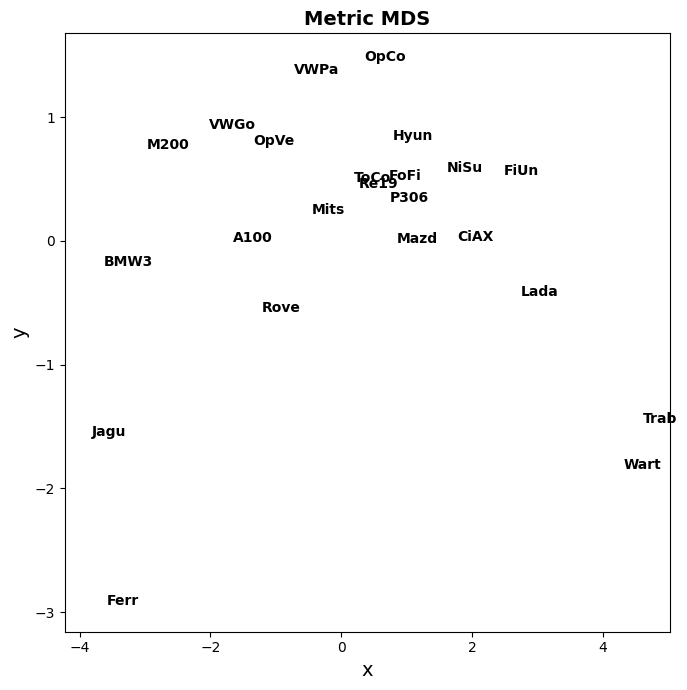

In [33]:
plt.figure(figsize=(7, 7))
plt.scatter(q[:, 0], q[:, 1], s=0)
for i, name in enumerate(labels):
    plt.text(q[i, 0], q[i, 1], name, fontsize=10, fontweight="bold")
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.title("Metric MDS", fontweight="heavy", fontsize=14)
plt.tight_layout()
plt.savefig("MVAmdscarm1", transparent=True, dpi=144)
plt.show()

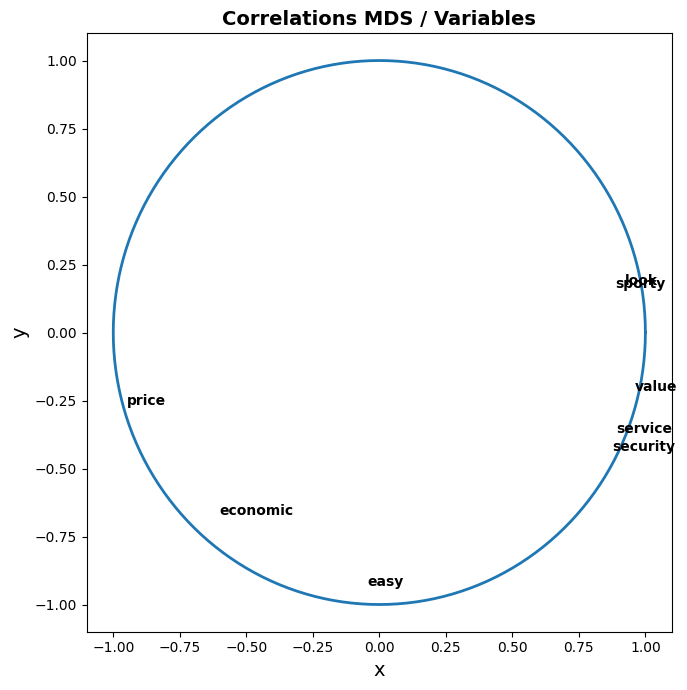

In [36]:
theta = np.deg2rad(np.arange(0, 361))
ucircle = np.column_stack([np.cos(theta), np.sin(theta)])

plt.figure(figsize=(7, 7))
plt.plot(ucircle[:, 0], ucircle[:, 1], linestyle="-", linewidth=2)
for i, v in enumerate(var_names):
    plt.text(r[i, 0], r[i, 1], v, fontsize=10, fontweight="bold")
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.title("Correlations MDS / Variables", fontweight="heavy", fontsize=14)
plt.tight_layout()
plt.savefig("MVAmdscarm2", transparent=True, dpi=144)
plt.show()